In [1]:
import h5py
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
plt.rcParams['figure.figsize'] = (12,8)
warnings.filterwarnings('ignore')

In [3]:
## Define data file paths
TRAIN_FILE_PATH = './datasets/train_catvnoncat.h5'
TEST_FILE_PATH = './datasets/test_catvnoncat.h5'

In [4]:
## Utlities
def load_dataset(train_file_path, test_file_path):
    
    train = h5py.File(train_file_path)
    test = h5py.File(test_file_path)
    
    labels = np.array(train['list_classes'].value, dtype = str)
    
    X_train = train['train_set_x'].value
    y_train = train['train_set_y'].value
    
    X_test = test['test_set_x'].value
    y_test = test['test_set_y'].value
    
    print(f"Train data shape : {X_train.shape}")
    print(f"Test data shape : {X_test.shape}")
    print(f"Number of classes : {labels}")
    return X_train, y_train, X_test, y_test, labels

In [5]:
X_train, y_train, X_test, y_test, labels = load_dataset(TRAIN_FILE_PATH, TEST_FILE_PATH)

Train data shape : (209, 64, 64, 3)
Test data shape : (50, 64, 64, 3)
Number of classes : ['non-cat' 'cat']



    Below image is : non-cat


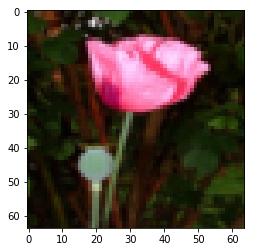

In [6]:
## Check the images and labels
index = 30
print(f"\n    Below image is : {labels[y_train[index]]}")
_ = plt.imshow(X_train[index,:,:,:],)

## Normalize Inputs

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0

## Create Feature Vector

In [8]:
X_train = X_train.reshape([X_train.shape[0],-1])
y_train = y_train.reshape([y_train.shape[0],1])

X_test = X_test.reshape([X_test.shape[0],-1])
y_test = y_test.reshape([y_test.shape[0],1])

In [9]:
print(f"Train data shape : {X_train.shape}")
print(f"Test data shape : {X_test.shape}")

Train data shape : (209, 12288)
Test data shape : (50, 12288)


## Single Layer NN

In [10]:
np.random.seed(121)

In [11]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

def initialize_parameters(m):
    w = np.zeros((1,m)) * 0.01
    b = 0
    return w,b

def calculate_loss(a,y):
    loss = - ( y * np.log(a) + (1-y) * np.log(1-a))
    loss = np.sum(loss.flatten())
    return loss/ len(y)

def forward(X,w,b):
    
    ## forward prop
    z = np.dot(X,w.T) + b    
    a = sigmoid(z)
    return a

def backward(a, y, X):
    dz = a - y
    dw = np.dot(dz.T,X)
    db = np.sum(dz)
    
    return dw,db

def gradient_descent(w,b,dw,db, learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w,b

def model(X_train,y_train, X_test, y_test, learning_rate, epochs = 2):
    
    ## initialize parameters
    w,b = initialize_parameters(X_train.shape[1])
    
    ## loss_list
    loss_list = []
    
    for epoch in range(epochs):
        
        ## forward
        a = forward(X_train,w,b)
        
        ## calcualte loss
        loss = calculate_loss(a,y_train)
        
        ## backward
        dw, db = backward(a,y_train, X_train)
        
        ## Gradient Descent
        w,b = gradient_descent(w,b,dw,db,learning_rate)
        
        ## print loss
#         print(f"Loss at epoch {epoch}: {loss}")
        loss_list.append(loss)
    
    params = {'w': w,'b': b,'loss': loss_list}
    return params

def calculate_accuracy(X,y,params,data_type):
    
    ##forward
    a  = forward(X, params['w'], params['b'])
    
    y_pred = a.flatten() > 0.5 if 1 else 0
    y_true = y.flatten()
    
    ## loss
    print(f"{data_type} accuracy : {np.round(np.mean(y_pred== y_true ) * 100,2)}")

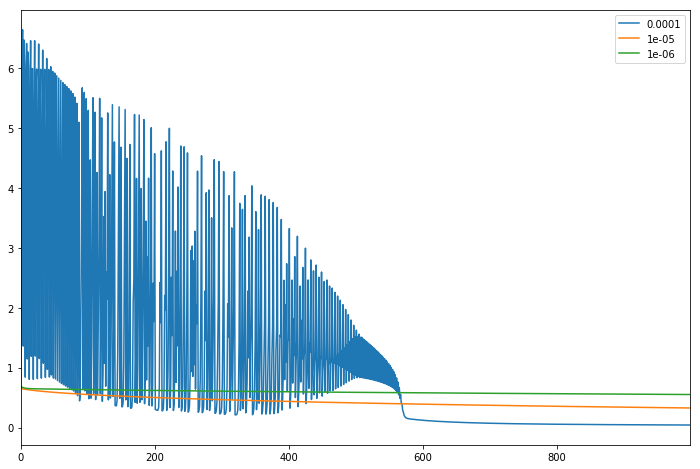

In [43]:
loss_df_list = []
for lr in [1e-4,1e-5,1e-6]:
    params = model(X_train,y_train,X_test,y_test, learning_rate= lr, epochs=1000)
    loss_df_list.append(pd.DataFrame(params['loss'], columns = [str(lr)]))
    
loss_df = pd.concat(loss_df_list)
loss_df.plot()

In [44]:
params = model(X_train,y_train,X_test,y_test, learning_rate=1e-4, epochs=1000)

In [45]:
calculate_accuracy(X_train,y_train,params,"train")
calculate_accuracy(X_test,y_test,params,"test")

train accuracy : 99.52
test accuracy : 68.0
